In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Polygon
from os import listdir
%matplotlib inline
from itertools import combinations

Sto plottando semplicemente il numero di hit vs i relativi conteggi

eventi totali: 4834
eventi buoni: 2406
% dati buoni data260.txt : 49.77244517997518 %
8182
numero bins 79
eventi totali: 4834
eventi buoni: 2406
% dati buoni data260.txt : 49.77244517997518 %
8182
numero bins 79
eventi totali: 4834
eventi buoni: 2406
% dati buoni data260.txt : 49.77244517997518 %
8182
numero bins 79
eventi totali: 2334
eventi buoni: 1464
% dati buoni data261.txt : 62.724935732647815 %
4070
numero bins 83
eventi totali: 553
eventi buoni: 362
% dati buoni data263.txt : 65.46112115732369 %
1502
numero bins 64
eventi totali: 2334
eventi buoni: 1464
% dati buoni data261.txt : 62.724935732647815 %
4070
numero bins 83
eventi totali: 553
eventi buoni: 362
% dati buoni data263.txt : 65.46112115732369 %
1502
numero bins 64
eventi totali: 2334
eventi buoni: 1464
% dati buoni data261.txt : 62.724935732647815 %
4070
numero bins 83
eventi totali: 553
eventi buoni: 362
% dati buoni data263.txt : 65.46112115732369 %
1502
numero bins 64
eventi totali: 2996
eventi buoni: 1674
% dati buo

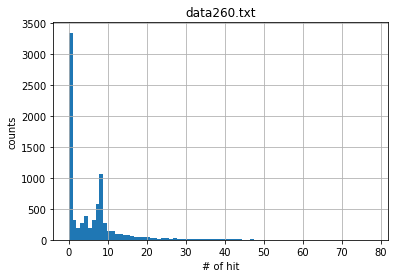

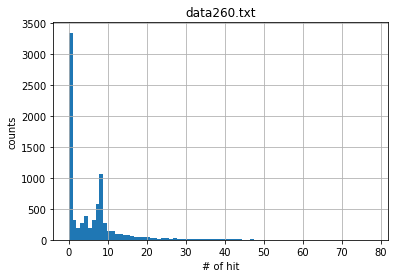

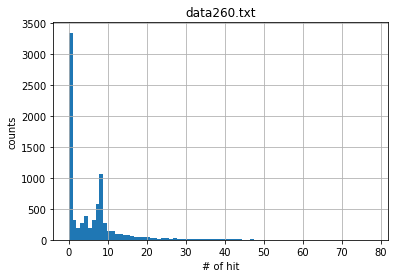

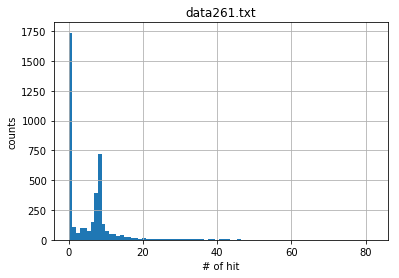

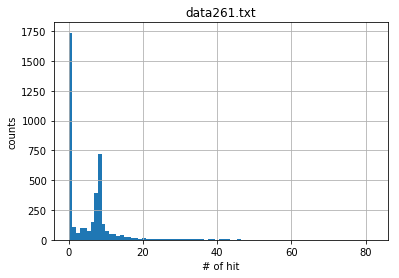

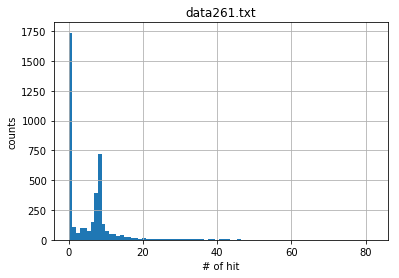

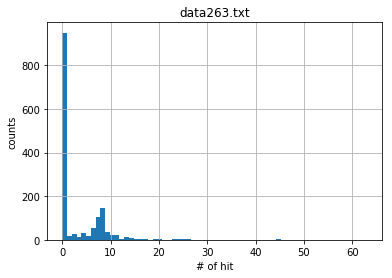

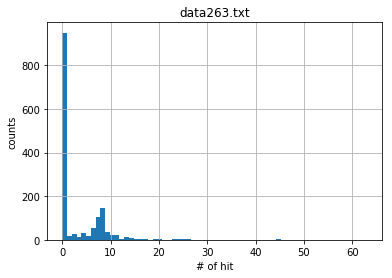

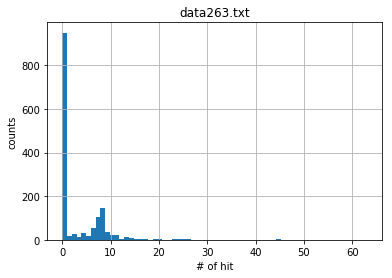

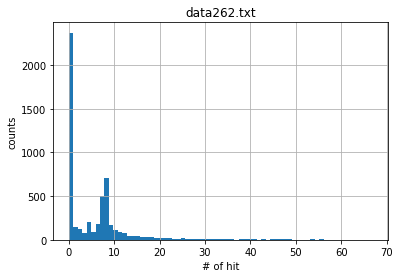

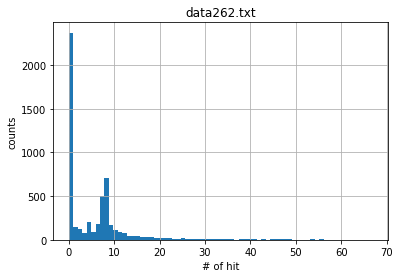

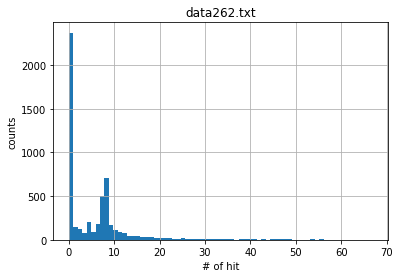

In [2]:
for i in listdir("/Users/gianmarco/OneDrive/UniPd/Magistrale/I Anno/Laboratory of Computational Physics/data/calibration/file uniti"):
    file="/Users/gianmarco/OneDrive/UniPd/Magistrale/I Anno/Laboratory of Computational Physics/data/calibration/file uniti"+"/"+i
    with open(file) as f:
        hit_num=[]
        for line in f:
            event = line.split()
            event = [float(i) for i in event]
            hit_num.append(event[1])
        eventi_tot=len(hit_num)+1
        eventi_buoni=0
        for j in hit_num: 
            if j==0: #qua voglio togliere da eventi_tot tutti gli eventi che hanno 0 hit
                eventi_tot-=1
            elif (j==6 or j==7 or j==8 or j==9 or j==10): #qua conto solo quelli che hanno 6/7/8/9/10 hit
                eventi_buoni+=1
    print("eventi totali:",eventi_tot)
    print("eventi buoni:",eventi_buoni)
    print("% dati buoni",i, ":", eventi_buoni/eventi_tot*100, "%")
    print(len(hit_num))
    bins=int(max(hit_num))+1
    #bins=[i for i in range(0,15)] #per plottare solo i dati più interessanti: avere ≈80 bin è inutile
    print("numero bins",bins)
    plt.figure()
    plt.hist(hit_num,bins)
    plt.xlabel("# of hit")
    plt.ylabel("counts")
    plt.title(i) 
    plt.grid(True)
    titolo=i+".png"
    plt.savefig(titolo)

In [3]:
# Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

[ 1.69725275 86.18214286]
[ 1.69725275 86.18214286]
[ 1.69725275 86.18214286]


/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


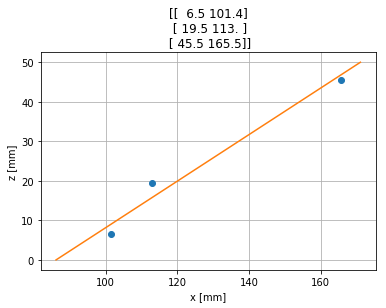

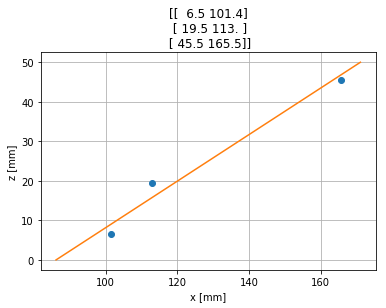

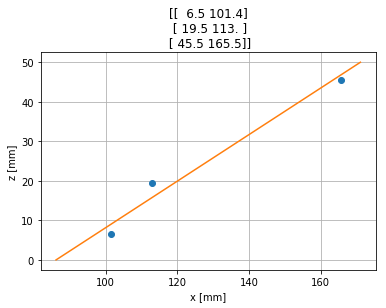

Chi^2: 61.320714285714395
[0.43725275 8.25071429]
Chi^2: 61.320714285714395
[0.43725275 8.25071429]
Chi^2: 61.320714285714395
[0.43725275 8.25071429]


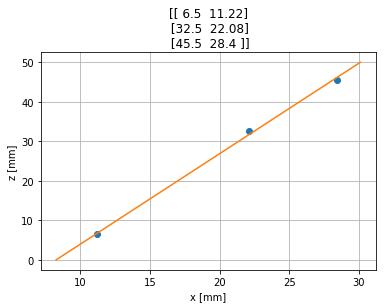

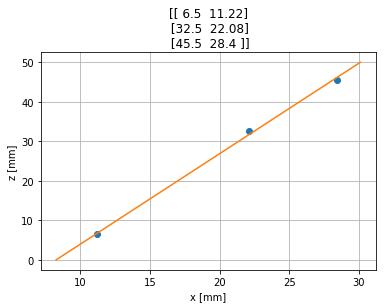

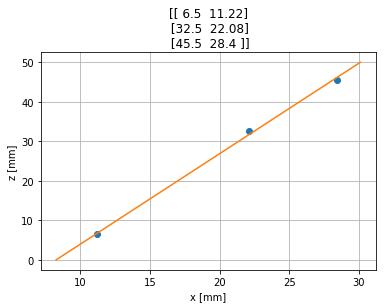

Chi^2: 0.22631428571428736
[1.37362637e-02 3.55046429e+02]
Chi^2: 0.22631428571428736
[1.37362637e-02 3.55046429e+02]
Chi^2: 0.22631428571428736
[1.37362637e-02 3.55046429e+02]


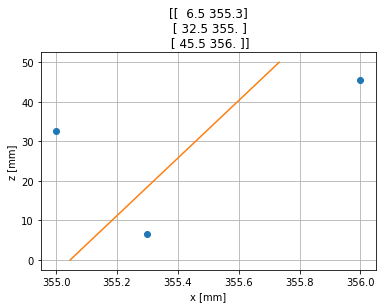

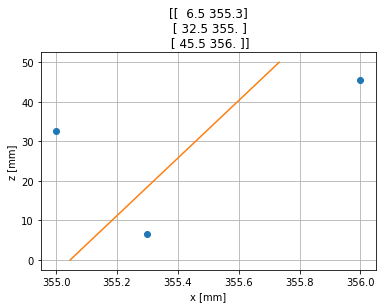

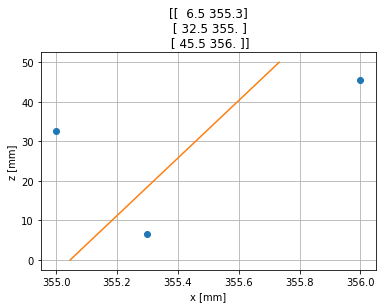

Chi^2: 0.37785714285710925
0
Chi^2: 0.37785714285710925
0
Chi^2: 0.37785714285710925
0


TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

TypeError: 'int' object is not subscriptable

In [4]:
for i in listdir("/Users/gianmarco/OneDrive/UniPd/Magistrale/I Anno/Laboratory of Computational Physics/data/calibration/file uniti"):
    file="/Users/gianmarco/OneDrive/UniPd/Magistrale/I Anno/Laboratory of Computational Physics/data/calibration/file uniti"+"/"+i
    with open(file) as f:
        for line in f:
            event = line.split()
            event = [float(i) for i in event]
            event_number = int(event[0])
            hits_number  = int(event[1])
            hit       = np.arange(hits_number)
            chamber   = np.fromiter((event[2+5*i] for i in range(hits_number)), int)
            layer     = np.fromiter((event[3+5*i] for i in range(hits_number)), int)
            xl_local  = np.fromiter((event[4+5*i] for i in range(hits_number)), float)
            xr_local  = np.fromiter((event[5+5*i] for i in range(hits_number)), float)
            z_local   = np.fromiter((local_z_shifts[i-1]+ZCELL/2 for i in layer), float)
            time      = np.fromiter((event[6+5*i] for i in range(hits_number)), float)
            xl_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xl_local
            xr_global = np.fromiter((global_x_shifts[i] for i in chamber), float) - xr_local
            z_global  = np.fromiter((global_z_shifts[i] for i in chamber), float) + z_local
            dataframe = pd.DataFrame(
                { 'EvNumber' : event_number,
                  'Hit'      : hit,
                  'Chamber'  : chamber,
                  'Layer'    : layer,
                  'XL_local' : xl_local,
                  'XR_local' : xr_local,
                  'Z_local'  : z_local,
                  'Time'     : time,
                  'XL_global': xl_global,
                  'XR_global': xr_global,
                  'Z_global' : z_global,
                })
            #dataframe.set_index('Hit', inplace=True) # set as index the number of the hit
            #print(dataframe)
            for j in range(0,4):
                dataframe1=dataframe.loc[dataframe['Chamber'] == j] #in questo modo ottengo un dataframe per ogni evento e chamber
                #print(dataframe1)
                unici=dataframe1['Layer'].nunique() 
                if unici>=3: #mi assicuro che ci siano almeno 3 hit in 3 layer diversi
                    xl=np.array(dataframe1['XL_local'])
                    #print(xl)
                    xr=np.array(dataframe1['XR_local'])
                    #print(xr)
                    z=np.array(dataframe1['Z_local'])
                    #print(z)
                    
                    puntir=[]
                    for j in range(0,np.shape(z)[0]):
                        puntir.append((z[j],xr[j]))
                    #print(puntir)
                    puntil=[]
                    for j in range(0,np.shape(z)[0]):
                        puntil.append((z[j],xl[j]))
                    #print(puntil)
                    layer1=[]
                    layer2=[]
                    layer3=[]
                    layer4=[]
                    for j in puntil:
                        if j[0]==6.5:
                            layer1.append(j)
                        elif j[0]==19.5:
                            layer2.append(j)
                        elif j[0]==32.5:
                            layer3.append(j)
                        elif j[0]==45.5:
                            layer4.append(j)
                    for j in puntir:
                        if j[0]==6.5:
                            layer1.append(j)
                        elif j[0]==19.5:
                            layer2.append(j)
                        elif j[0]==32.5:
                            layer3.append(j)
                        elif j[0]==45.5:
                            layer4.append(j)
                    #print(layer1)
                    #print(layer2)
                    #print(layer3)
                    #print(layer4)
                    if unici==3: #PER CREARE LE COMBINAZIONI CON 3 ELEMENTI
                        if len(layer1)==0:
                            combinazioni=np.array([(x,y,z) for x in layer2 for y in layer3 for z in layer4])
                        elif len(layer2)==0:
                            combinazioni=np.array([(x,y,z) for x in layer1 for y in layer3 for z in layer4])
                        elif len(layer3)==0:
                            combinazioni=np.array([(x,y,z) for x in layer1 for y in layer2 for z in layer4])
                        elif len(layer4)==0:
                            combinazioni=np.array([(x,y,z) for x in layer1 for y in layer2 for z in layer3])
                        #print(combinazioni)
                        chimin=1000
                        dati_buoni=0
                        c=0
                        for i in combinazioni: #PER OGNI COMBINAZIONE FACCIO IL FIT, CALCOLO IL CHI^2 E PLOTTO SOLO LA COMBINAZIONE CON IL CHI MINORE
                            p=np.polyfit(i[:,0], i[:,1], 1) #calcolo coeff
                            #print("coefficienti fit:",p)
                            chi_squared=np.sum(((np.polyval(p, i[:,0]) - i[:,1]) ** 2)) #calcolo chi2
                            #print("chiquadro:",chi_squared)
                            if chi_squared<chimin: #trovo il chi minore e salvo la combianzione e i parametri ad esso associato
                                chimin=chi_squared
                                dati_buoni=i
                                c=p
                        print(c)
                        x=np.linspace(0,50,50)
                        y=x*c[0]+c[1] #da sistemare!!
                        plt.figure()
                        plt.plot(dati_buoni[:,1], dati_buoni[:,0],"o",label='original data')
                        plt.plot(y,x,"-",label="fitted data")
                        plt.xlabel("x [mm]")
                        plt.ylabel("z [mm]")
                        plt.title(dati_buoni) #DA SISTEMARE IL TITOLO    
                        plt.grid(True)
                        plt.show()
                        print("Chi^2:",chimin)
                    """elif unici==4: #PER CREARE LE COMBINAZIONI CON 4 ELEMENTI
                        combinazioni=np.array([(x,y,z,w) for x in layer1 for y in layer2 for z in layer3 for w in layer4])
                        #print(combinazioni)
                        chimin=1000
                        dati_buoni=0
                        coeff=0
                        for i in combinazioni:
                            p=np.polyfit(i[:,0], i[:,1], 1)
                            #print(p)
                            chi_squared=np.sum(((np.polyval(p, i[:,0]) - i[:,1]) ** 2))
                            #print(chi_squared)
                            if chi_squared<chimin:
                                chimin=chi_squared
                                dati_buoni=i
                                coeff=p
                        print(c)
                        x=np.linspace(0,50,50)
                        y=x*c[0]+c[1]
                        plt.figure()
                        plt.plot(dati_buoni[:,1], dati_buoni[:,0],"o",label='original data')
                        plt.plot(y,x,"-",label="fitted data")
                        plt.xlabel("x [mm]")
                        plt.ylabel("z [mm]")
                        plt.title(dati_buoni) #DA SISTEMARE IL TITOLO    
                        plt.grid(True)
                        plt.show()
                        print("Chi^2:",chimin)
                    """